In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
data = pd.read_csv('diabetes.csv')
X = data.drop(['Outcome'], axis = 1)
y = data ['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 55)
logreg = LogisticRegression(max_iter = 1000) # max_iter = 1000 komutunu hata verdigi icin yazdim
logreg.fit(X_train, y_train)
y_prediction = logreg.predict(X_test)

from sklearn.metrics import roc_curve
y_prediction_p = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prediction_p)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.plot(fpr, tpr, label = 'Lojistik Regresyon')
plt.plot([0,1],[0,1])
plt.title('ROC Egrisi')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

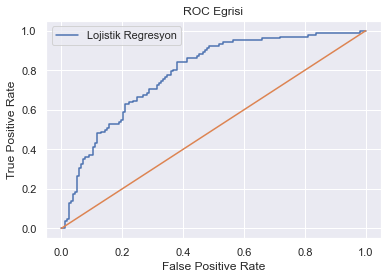

In [ ]:
# Area Under Curve (AUC) | Egrisinin Altinda Kalan Alan

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_prediction_p)

0.7843137254901961

In [ ]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(logreg, X, y, cv = 5, scoring = 'roc_auc')
print(cv)

[0.81240741 0.80777778 0.82555556 0.87283019 0.84471698]

Soru 1: **AUC performansını değerlendirmek için hangisinin kullanılması gereklidir?**

In [ ]:
#Cevap : roc_auc_score

Soru 2: **AUC değerinin yüksek olması neyi ifade eder?**

In [ ]:
#Cevap : Model performansinin iyi olmasini

Soru 3: **Başarılı bir modelin ROC eğrisi ile ilgili verilenlerden hangisi doğrudur?**

In [ ]:
#Cevap : Egri sol ust koseye yakindir